### Sentimental_analysis_Amazon_Data.csv          use this csv for amazon data

### Twitter_Final_Data.csv            use this csv for twitter data

### Read the csv using pandas

In [1]:
import pandas as pd
Amazon = pd.read_csv('Sentimental_analysis_Amazon_Data.csv')
# Read the csv using pandas

In [2]:
Twitter = pd.read_csv('Twitter_Final_Data.csv')
# Read the csv using pandas

In [3]:
Amazon.drop(['Unnamed: 0','Product Name','Brand Name','Price','Reviews','Review Votes','text_lower','text_url','text_punct','text_stopwords','text_correct','text_emoji','text_removetag','Reviews_Sentiment_polarity','Reviews_Sentiment_subjectivity','Sentiment','Subjectivity'], axis = 1, inplace = True)

In [4]:
Amazon

,Rating,text_lemmatized
0,5,feel lucky found used phone u used hard phone ...
1,4,nice phone nice grade patch review clean set e...
2,5,pleased
3,4,work good go slow sometimes good phone love
4,4,great phone replace lost phone thing volume bu...
...,...,...
9994,1,word can describe unsatisfied product order ph...
9995,2,first phone receive great condition rival bran...
9996,4,black color white took white color sent free c...
9997,1,phone unlocked received tried several carrier ...


### Dividing the rating into 2 class as Logistic Regression model work on two class only

In [5]:
Amazon['sentiments'] = Amazon['Rating'].apply(lambda x: 1 if x>=3 else 0)
Amazon.head(15)

,Rating,text_lemmatized,sentiments
0,5,feel lucky found used phone u used hard phone ...,1
1,4,nice phone nice grade patch review clean set e...,1
2,5,pleased,1
3,4,work good go slow sometimes good phone love,1
4,4,great phone replace lost phone thing volume bu...,1
5,1,already phone problem know stated used sang st...,0
6,2,charging port loose got ordered needed new bat...,0
7,2,phone look good wouldn stay charged buy new ba...,0
8,5,originally using samson s galaxy spring wanted...,1
9,3,battery life great responsive touch issue some...,1


In [6]:
import pandas as pd
import nltk
from sklearn import metrics 
import sklearn
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [11]:
stopset = list(stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents = 'ascii', stop_words=stopset)

In [12]:
y = Amazon.sentiments

In [13]:
%%time
X = vectorizer.fit_transform(Amazon['text_lemmatized'].values.astype('U'))

CPU times: total: 312 ms
Wall time: 312 ms


In [14]:
print (y.shape)
print (X.shape)

(9999,)
(9999, 9395)


### Split data into training and testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Naive Bayes Method

In [16]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [17]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.9463889797987576

In [18]:
prediction = clf.predict(X_test)

### Classification Report

In [19]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, prediction))
print('-'*80)
print('Accuracy', accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.39      0.55       688
           1       0.81      0.99      0.89      1812

    accuracy                           0.83      2500
   macro avg       0.89      0.69      0.72      2500
weighted avg       0.85      0.83      0.80      2500

--------------------------------------------------------------------------------
Accuracy 0.8276


In [20]:
Twitter

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,...,text_punct,text_stopwords,text_correct,text_emoji,text_removetag,text_lemmatized,Reviews_Sentiment_polarity,Reviews_Sentiment_subjectivity,Sentiment,Subjectivity
0,0,ZeeNewsEnglish,https://t.co/i9J1GUZmSP brings you the latest ...,India,27,5646188,452504,0,Massive discounts on Apple #iPhone13; effectiv...,"['iPhone13', 'Discounts', 'Apple', 'iPhone']",...,massive discounts on apple iphone13 effective ...,massive discounts apple iphone13 effective pri...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,0.300000,0.900000,POSITIVE,objective
1,1,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,'PayCM campaign': HC quashes cases against 2 C...,"['Iphone13', 'Breakingnews', 'Indiapolitics', ...",...,paycm campaign hc quashes cases against 2 cong...,paycm campaign hc quashes cases 2 cong leaders...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bush case 2 cong leader mleqjq...,0.160000,0.540000,POSITIVE,objective
2,2,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,Kamal Nath slams Shivraj govt over alleged cor...,"['NewsPaper', 'Breakingnews', 'Indiapolitics',...",...,kamal nath slams shivraj govt over alleged cor...,kamal nath slams shivraj govt alleged corrupti...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slum shivraj got alleged corruption...,-0.100000,0.100000,NEGATIVE,objective
3,3,d_rocky98,Missing,Missing,132,18,120,0,https://t.co/BEA3WhsrPU\nChance to win for fre...,"['Iphone', 'iPhone13', 'iPhone13Pro', 'iPhone1...",...,bea3whsrpu chance to win for free iphone 1314 ...,bea3whsrpu chance win free iphone 1314 promax ...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,0.600000,0.600000,POSITIVE,objective
4,4,cylartgallery,Art Gallery by Simone Morana Cyla @cyla78 #art...,Las Palmas de Gran Canaria,3035,2411,569,10,🥰 RAZR CASES COLLECTION ❤️\n👉👉 https://t.co/aw...,"['iphone', 'society6', 'fashion', 'fashionblog...",...,razr cases collection awofddwkft iphone soc...,razr cases collection awofddwkft iphone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor case collection awofddwkft phone society...,0.000000,0.000000,NEUTRAL,subjective
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5180,5180,NAIJAVILLE1,"🐼A platform for all gists,topics and news arou...","Ikeja, Nigeria",1259,246,9714,0,@DONJAZZY \nDAY 3 COUNTDOWN SEEKING OF BIRTHDA...,"['DonJazzy', 'birthday', '25y', 'cakes', 'lapt...",...,donjazzy day 3 countdown seeking of birthday g...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,0.800000,0.750000,POSITIVE,objective
5181,5181,YaD3v,‏الصفحة الخاصه بـ YaD3v لبرمجة تطبيقات الـ iOS...,Saudi Arabia,6,129,2390,0,Download #UTG pro to get all #video_games info...,"['UTG', 'video_games', 'iOS', 'iPhone', 'iPad'...",...,download utg pro to get all video_games inform...,download utg pro get video_games information w...,download ut pro get video_games information wa...,download ut pro get video_games information wa...,download ut pro get video_games information wa...,download 

In [21]:
Twitter.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [22]:
#Twitter['Naive_Bayes_output'] = vectorizer.transform(Twitter['text_lemmatized'])
import numpy as np
#review_twitter = np.array(["calling teacher get personalised phone case also work well new teacher gift 1dzo9d99mz womaninbizhour inbizhour yourbizhour maker bizbubble craftbizparty pixel6 samsungs22ultra iphone13promax dokkaysi9c"])
#review_twitter = np.array(["I already had a phone with problems... I know it stated it was used, but dang, it did not state that it did not charge. I wish I would have read these comments then I would have not purchased this item.... and its cracked on the side.. damaged goods is what it is.... If trying to charge it another way does not work I am requesting for my money back... AND I WILL GET MY MONEY BACK...SIGNED AN UNHAPPY CUSTOMER...."])
review_twitter = np.array(Twitter['text_lemmatized'])
review_twitter_vector = vectorizer.transform(review_twitter)
Twitter['Naive_Bayes_output'] = clf.predict(review_twitter_vector)

In [23]:
Twitter

,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,SearchHastags,...,text_stopwords,text_correct,text_emoji,text_removetag,text_lemmatized,Reviews_Sentiment_polarity,Reviews_Sentiment_subjectivity,Sentiment,Subjectivity,Naive_Bayes_output
0,ZeeNewsEnglish,https://t.co/i9J1GUZmSP brings you the latest ...,India,27,5646188,452504,0,Massive discounts on Apple #iPhone13; effectiv...,"['iPhone13', 'Discounts', 'Apple', 'iPhone']",#iphone13,...,massive discounts apple iphone13 effective pri...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,massive discount apple iphone13 effective pric...,0.300000,0.900000,POSITIVE,objective,1
1,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,'PayCM campaign': HC quashes cases against 2 C...,"['Iphone13', 'Breakingnews', 'Indiapolitics', ...",#iphone13,...,paycm campaign hc quashes cases 2 cong leaders...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bushes cases 2 cong leaders ml...,pay campaign he bush case 2 cong leader mleqjq...,0.160000,0.540000,POSITIVE,objective,1
2,Andhravilasnews,Andhravilas Gives you #Tollywood #Bollywood f...,USA,91,2617,254132,0,Kamal Nath slams Shivraj govt over alleged cor...,"['NewsPaper', 'Breakingnews', 'Indiapolitics',...",#iphone13,...,kamal nath slams shivraj govt alleged corrupti...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slums shivraj got alleged corruptio...,canal path slum shivraj got alleged corruption...,-0.100000,0.100000,NEGATIVE,objective,0
3,d_rocky98,Missing,Missing,132,18,120,0,https://t.co/BEA3WhsrPU\nChance to win for fre...,"['Iphone', 'iPhone13', 'iPhone13Pro', 'iPhone1...",#iphone13,...,bea3whsrpu chance win free iphone 1314 promax ...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,bea3whsrpu chance win free phone 1314 prompt p...,0.600000,0.600000,POSITIVE,objective,1
4,cylartgallery,Art Gallery by Simone Morana Cyla @cyla78 #art...,Las Palmas de Gran Canaria,3035,2411,569,10,🥰 RAZR CASES COLLECTION ❤️\n👉👉 https://t.co/aw...,"['iphone', 'society6', 'fashion', 'fashionblog...",#iphone13,...,razr cases collection awofddwkft iphone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor cases collection awofddwkft phone societ...,razor case collection awofddwkft phone society...,0.000000,0.000000,NEUTRAL,subjective,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5180,NAIJAVILLE1,"🐼A platform for all gists,topics and news arou...","Ikeja, Nigeria",1259,246,9714,0,@DONJAZZY \nDAY 3 COUNTDOWN SEEKING OF BIRTHDA...,"['DonJazzy', 'birthday', '25y', 'cakes', 'lapt...",#iphone11,...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,donjazzy day 3 countdown seeking birthday gift...,0.800000,0.750000,POSITIVE,objective,1
5181,YaD3v,‏الصفحة الخاصه بـ YaD3v لبرمجة تطبيقات الـ iOS...,Saudi Arabia,6,129,2390,0,Download #UTG pro to get all #video_games info...,"['UTG', 'video_games', 'iOS', 'iPhone', 'iPad'...",#iphone11,...,download utg pro get video_games information w...,download ut pro get video_games information wa...,download ut pro get video_games information wa...,download ut pro get video_games information wa...,download ut pro get video_game information wan...,0.400000,0.400000,POSITIVE,objective,1
5182,kiddzillastudio,Missing,Missing,4,0,2,0,Legends Never Die. Our New iPhone Case design ...,"['iphone11', 'phone12', 'iphone13', 'iphone14'...",#iphone11,...,legends never die new iphone case

In [24]:
filename = 'NaiveBayes_Output.csv'
Twitter.to_csv(filename)

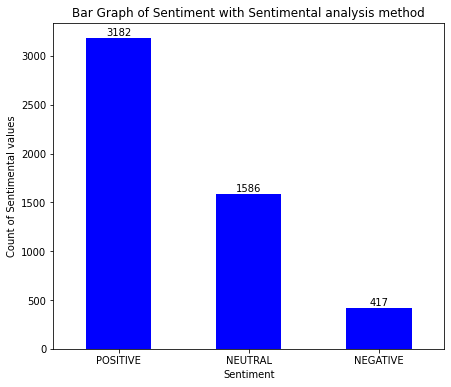

In [27]:
import matplotlib.pyplot as plt
Sentiment = Twitter['Sentiment'].value_counts()
plt.figure(figsize=(7, 6))
ax = Sentiment.plot(kind='bar', rot=0, color="b")
ax.set_title("Bar Graph of Sentiment with Sentimental analysis method", y = 1)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count of Sentimental values')
ax.set_xticklabels(('POSITIVE', 'NEUTRAL', 'NEGATIVE'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

### Naive_Bayes_Sentiment

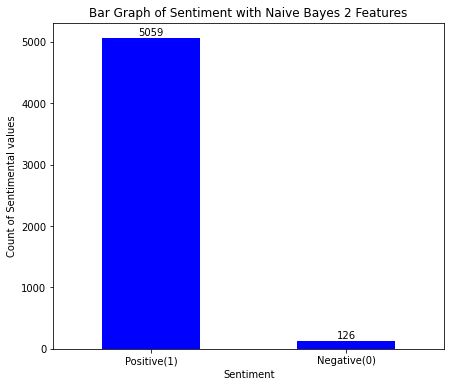

In [28]:
import matplotlib.pyplot as plt
Sentiment = Twitter['Naive_Bayes_output'].value_counts()
plt.figure(figsize=(7, 6))
ax = Sentiment.plot(kind='bar', rot=0, color="b")
ax.set_title("Bar Graph of Sentiment with Naive Bayes 2 Features", y = 1)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count of Sentimental values')
ax.set_xticklabels(('Positive(1)', 'Negative(0)'))


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()